# <center> INTRODUÇÃO A DATASCIENCE </center> 

#### Fernando A. Correia dos S. Junior <br> João Vitor Chaves de Oliveira

Árvore geradora mínima problema valorar as arestas <br>
Por que é necessário ser acíclico? O grafo? 

## ToDo List

- **E dos demais, quantos tem uma citação? e duas?  ## Só chamar out_degree ou in_degree passando 1,2 ...**
- **And after that?How many has more than 10 citations? And 100? **
- **Distribuição de graus, comparação por ano e com o total**
- **Distribuição de número de componentes, comparação por ano e com o total**
- Distribuição da média de nós por componentes, comparação por ano e com o total
- Comparar medidas de centralidade, escolher 3 casos e plotar a distribuição das métricas ao longo do tempo.
- **Hubs e Authorities** 

In [1]:
import networkx as nx
import json
import random
import re
import scipy
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
class Graph():
    def __init__(self, file_path, graph_name="grafo-normalizado"):
        self.graph_name = graph_name
        self.graph = self.generateGraph(file_path)
        self.edges = list(self.graph.edges)
        self.nodes = list(self.graph.nodes)
        self.nodes.sort()  # lexicographical order
        self.number_of_edges = len(self.edges)
        self.number_of_nodes = len(self.nodes)
        self.in_degree = {k: self.graph.in_degree(k) for k in self.nodes}
        self.out_degree = {k: self.graph.out_degree(k) for k in self.nodes}
        self.max_out_degree = max(self.out_degree)
        self.min_out_degree = min(self.out_degree)
        self.max_in_degree = max(self.in_degree)
        self.min_in_degree = min(self.in_degree)

        self.density = self.number_of_edges / (self.number_of_nodes * (self.number_of_nodes - 1))
#         self.triangles = nx.triangles(self.graph)  # not implemented for directed type
        
        # measures centrality based
        self.centralities = nx.algorithms.degree_centrality(self.graph)
        self.betweenness = nx.algorithms.betweenness_centrality(self.graph)
        self.closeness = nx.algorithms.closeness_centrality(self.graph)
        self.eigenvector = nx.algorithms.eigenvector_centrality_numpy(self.graph)

        self.hubs, self.authorities = nx.hits(self.graph)
        self.reciprocity = nx.algorithms.reciprocity(self.graph)
    
    def reciprocity_for(self, node):
        return nx.algorithms.reciprocity(self.graph, node)

    def generateGraph(self, file_path):
        g = nx.DiGraph()
        graph_json = json.load(open(file_path)) 
        keys = graph_json.keys()
        for i in keys:
            values = graph_json[i]
            for j in values:
                g.add_edge(i,j)
        return g

    def saveGraph(self):
        nx.write_graphml(self.graph, path='%s.graphml' % self.graph_name)
    
    def showGraph(self): #plota o grafo mas não fica tão legal 
        plt.figure(figsize=(10, 10))
        nx.draw(self.graph, node_size=20, linewidths=1, node_color='blue', font_size=8)
        plt.axis('equal')
        plt.show()

#     ## graph y
#     def number_of_cliques(self, v=4):
#         pass
    
#     def ego_for(self, v):
#         # the densenty of the subgraph witout v
#         pass

#     def number_strongly_connected_component(self):
#         return nx.number_strongly_connected_components(self.G)

#     def strongly_connected_component(self):
#         return sorted(nx.connected_components(self.G), key=len, reverse=True)
        
#     def degree_distribuition(self, title_year = ''):
#         din = self.max_degree('in')
#         dout = self.max_degree('out')
#         MaxDegree = max(din,dout)
#         values = np.zeros([MaxDegree+1,2])
        
#         for i in range(MaxDegree+1):
#             values[i][0] = len(self.in_degree(i))
#             values[i][1] = len(self.out_degree(i))
#         df = pd.DataFrame(values,columns=['Grau de entrada','Grau de Saída'])
#         p = df.plot.bar()
#         p.set_xlabel(u'Grau')
#         p.set_ylabel(u'Número de vértices')
#         p.set_title(u"Número de vértices por grau "+title_year)


In [3]:
G = Graph('normalizado_citation_map_aborto_lista_de_adj.json')

In [4]:
G.hubs

{u'ao 16 stf': 0.0,
 u'hc 85826 stf': 0.0,
 u'rhc 82288 stf': 0.0,
 u'hc 109133 stf': 0.0,
 u're 348827 stf': 0.0,
 u'hc 73686 stf': 0.0,
 u'ext 785 stf': 0.0,
 u'adc 12 stf': 0.0,
 u're 596682 stf': 0.0,
 u'hc 87921 stf': 0.0,
 u'hc 93596 stf': 0.0,
 u'rhc 2 stj': 0.0,
 u'hc 83227 stf': 7.552354311414224e-66,
 u'hc 89877 stf': 0.0,
 u'resp 34322 stj': 0.0,
 u'rcl 2617 stf': 0.0,
 u'rhc 3249080 stj': 0.0,
 u'adpf 73 stf': 0.0,
 u'hc 94730 stf': 1.1691110601879382e-53,
 u'hc 82684 stf': 0.0,
 u'hc 345300 stj': 0.0,
 u'hc 84095 stf': 0.0,
 u'hc 116384 stf': 0.0,
 u'hc 8142130 stf': 0.0,
 u'ao 51 stf': 0.0,
 u'rcl 5754 stf': 0.0,
 u'ap 259 stf': 0.0,
 u'adpf 54 stf': 0.0,
 u'hc 79775 stf': 0.0,
 u'hc 79776 stf': 0.0,
 u'adi 304 stf': 0.0,
 u'rcl 11022 stf': 0.0,
 u'hc 125969 stf': 1.4067356123429206e-45,
 u'sum. 734 stf': 0.0,
 u'if 5129 stf': 0.0,
 u'hc 61684 stj': 0.0,
 u're 740813 stf': 0.0,
 u'hc 84025 stf': 5.370835263139308e-05,
 u'rcl 4703 stf': 0.0,
 u'rcl 4756 stf': 0.0,
 u'inq 3

In [9]:
list(nx.simple_cycles(G.graph))

[[u'adi 4277 stf', u'adpf 132 stf']]

In [10]:
G.graph

TypeError: 'module' object is not callable

1251.0
1655.0
0.00105835331735
adpf 54 stf


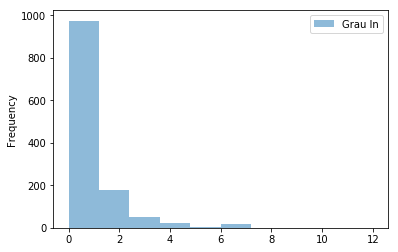

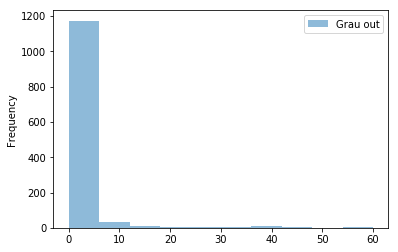

In [3]:
G = Graph('normalizado_citation_map_aborto_lista_de_adj.json') #Construtor passa o JSON
G.generateGraph()
# print(G.density())
# n is the number of nodes and m is the number of edges in G.
n = float(G.getNumberOfVertex())
print(n)
m = float(G.getNumberOfEdges())
print(m)
density =  m / (n * (n - 1))
print(density)

print(G.get_vertex_max_in_degree())

df4 = pd.DataFrame(G.list_in_degree(), columns=['Grau In'])
plt.figure();
df4.plot.hist(alpha=0.5)

df4 = pd.DataFrame(G.list_out_degree(), columns=['Grau out'])
plt.figure();
df4.plot.hist(alpha=0.5)



[0, 0, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 11, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 19, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0]


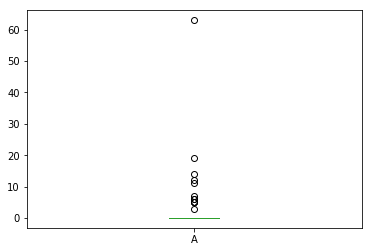

In [85]:
print(G.list_out_degree())

df = pd.DataFrame(G.list_out_degree(), columns=['A'])

df.plot.box()

In [79]:
x = G.list_in_degree()
print x
print sum(x)/float(len(x))

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
0.941520467836


### Distribuição de decisões por ano

Text(0.5,1,u'N\xfamero de decis\xf5es por ano')

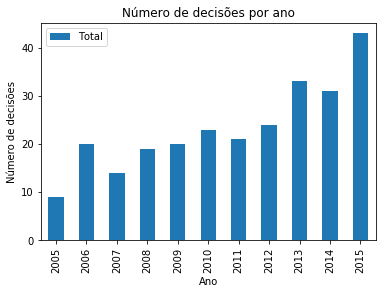

In [60]:
distribuicao = {
    2005: 9,
    2006: 20,
    2007: 14,
    2008: 19,
    2009: 20,
    2010: 23,
    2011: 21,
    2012: 24,
    2013: 33,
    2014: 31,
    2015: 43
}

df = pd.DataFrame(distribuicao.values(), index=distribuicao.keys() ,columns=['Total'])
p = df.plot.bar()
p.set_xlabel(u'Ano')
p.set_ylabel(u'Número de decisões')
p.set_title(u"Número de decisões por ano")

### Importando o Arquivo para manipulação do grafo

In [134]:
G = Graph('normalizado_citation_map_aborto_lista_de_adj.json') #Construtor passa o JSON
G.generateGraph() #Gera o grafo a partir do JSON
G.saveGraph() # SALVA O ARQUIVO, plotar na Gephi

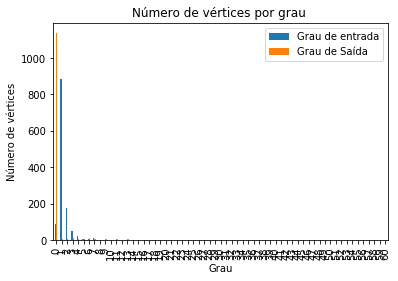

In [135]:
G.degree_distribuition()

In [136]:
G.number_strongly_connected_component()

1250

In [137]:
print("Número total de vértices: %s " % len(G.nodes()))

Número total de vértices: 1251 


#### 1. Quantos processos na rede não foram citados?

In [138]:
print("%s processos não são citados "%len(G.in_degree(0)))

89 processos não são citados 


#### 2. Quantos processos na rede não citam ninguém ?

In [139]:
print("%s processos não citam ninguém "%len(G.out_degree(0)))

1138 processos não citam ninguém 


### Centralidades

In [140]:
centralities_degree = G.centrality()
#for i in centralities_degree:
#    print(centralities_degree[i])

In [141]:
centralities_betweenness = G.betweenness_centrality()
#for i in centralities_degree:
centralities_eingenvector = G.eigenvector_centrality()
#    print(i, ' : ',centralities_betweenness[i])

Text(0.5,1,u'Top 10 com maior Betweeness')

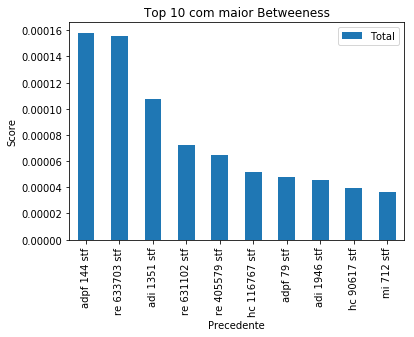

In [142]:
centralities_eingenvector = G.eigenvector_centrality()

centralities_betweenness = [(k, v) for k, v in centralities_betweenness.items()]
centralities_betweenness.sort(key=lambda x: x[1], reverse=True)

btw_v = [i[1] for i in centralities_betweenness[:10]]
btw_i = [i[0] for i in centralities_betweenness[:10]]
df = pd.DataFrame(btw_v, index=btw_i ,columns=['Total'])
p = df.plot.bar()
p.set_xlabel(u'Precedente')
p.set_ylabel(u'Score')
p.set_title(u"Top 10 com maior Betweeness")

In [122]:
for ano in range(2005, 2016, 2):
    G = Graph('normalizado_citation_map_aborto_%s-%s.json' % (ano, ano + 1), "%s-%s" % (ano, ano + 1))
    G.generateGraph()
    G.saveGraph()

## Distribuição de vértices por grau (in/out) em cada ano.

In [31]:
G1 = Graph('normalizado_citation_map_aborto_2005-2006.json')
G2 = Graph('normalizado_citation_map_aborto_2007-2008.json')
G3 = Graph('normalizado_citation_map_aborto_2009-2010.json')
G4 = Graph('normalizado_citation_map_aborto_2011-2012.json')
G5 = Graph('normalizado_citation_map_aborto_2013-2014.json')
G6 = Graph('normalizado_citation_map_aborto_2015-2016.json')
graphs_as_list = [G1, G2, G3, G4, G5, G6]
graphs_per_year = {'2005-2006':G1,'2007-2008':G2,'2008-2009':G3,'2010-2011':G4,'2012-2013':G5,'2014-2015':G6}

[67, 30, 312, 75, 36, 158]


Text(0.5,1,u'M\xe9dia de Grau-In por janela')

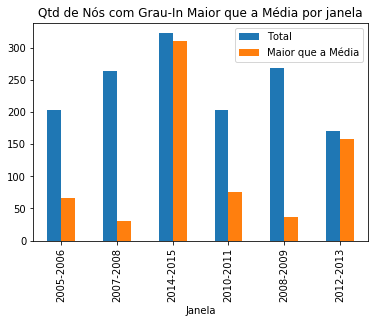

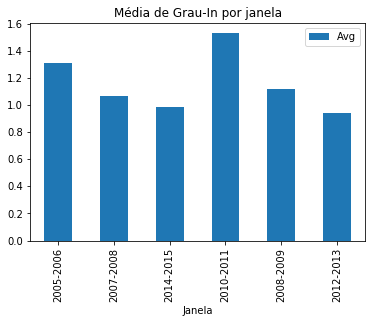

In [106]:
# degree in
in_degree = []
avg_in_degree = []
avg_in_degree_avg = []
for G in graphs_per_year.values():
    G.generateGraph()
    _in = G.list_in_degree()
    in_degree.append(len(_in))
    avg_in_degree.append(len([x for x in _in if x > np.average(_in)]))
    avg_in_degree_avg.append(np.average(_in))

print avg_in_degree

df = pd.DataFrame({u"Maior que a Média": avg_in_degree, u"Total": in_degree}, index=graphs_per_year.keys() ,columns=[u"Total", u"Maior que a Média"])
p = df.plot.bar()
p.set_xlabel(u'Janela')
p.set_title(u"Qtd de Nós com Grau-In Maior que a Média por janela")

df = pd.DataFrame({"Avg": avg_in_degree_avg}, index=graphs_per_year.keys() ,columns=["Avg"])
p = df.plot.bar()
p.set_xlabel(u'Janela')
p.set_title(u"Média de Grau-In por janela")

[11, 20, 12, 17, 23, 13]


Text(0.5,1,u'M\xe9dia de Grau-Out por janela')

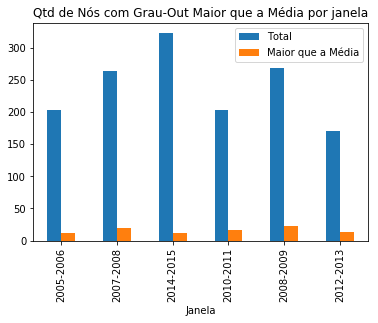

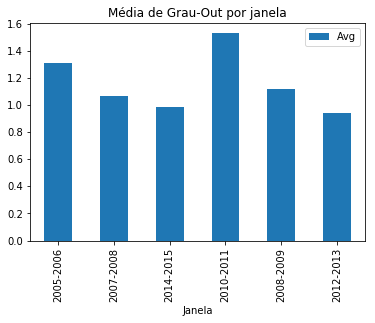

In [104]:
# degree out
out_degree = []
avg_out_degree = []
avg_out_degree_avg = []
for G in graphs_per_year.values():
    G.generateGraph()
    out = G.list_out_degree()
    out_degree.append(len(out))
    avg_out_degree.append(len([x for x in out if x > np.average(out)]))
    avg_out_degree_avg.append(np.average(out))

print avg_out_degree

df = pd.DataFrame({u"Maior que a Média": avg_out_degree, u"Total": out_degree}, index=graphs_per_year.keys() ,columns=[u"Total", u"Maior que a Média"])
p = df.plot.bar()
p.set_xlabel(u'Janela')
p.set_title(u"Qtd de Nós com Grau-Out Maior que a Média por janela")

df = pd.DataFrame({"Avg": avg_out_degree_avg}, index=graphs_per_year.keys() ,columns=["Avg"])
p = df.plot.bar()
p.set_xlabel(u'Janela')
p.set_title(u"Média de Grau-Out por janela")

In [ ]:
for graph in graphs_per_year.values():
    graph.generateGraph()
    graph.saveGraph()

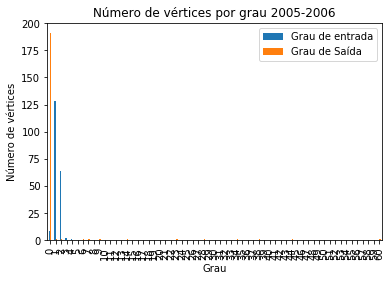

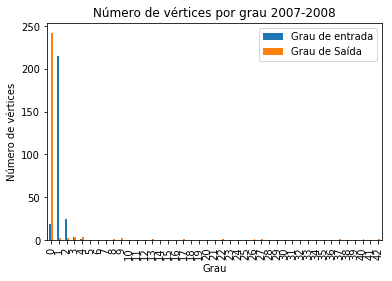

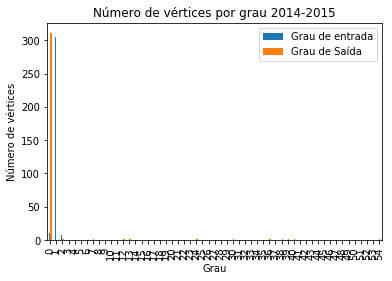

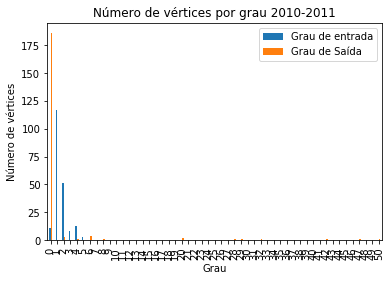

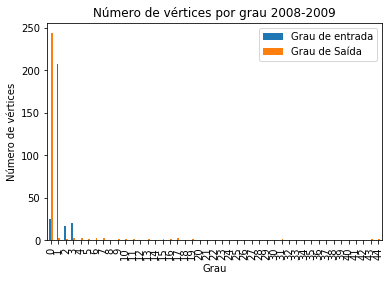

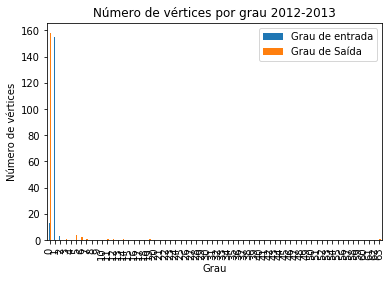

In [17]:
keys= list(graphs_per_year.keys())
for i,graph in enumerate(graphs_per_year.values()):
    graph.degree_distribuition(keys[i])

## Número de componentes por ano

In [18]:
print(keys)

['2005-2006', '2007-2008', '2014-2015', '2010-2011', '2008-2009', '2012-2013']


Text(0,0.5,u'N\xfamero de componentes')

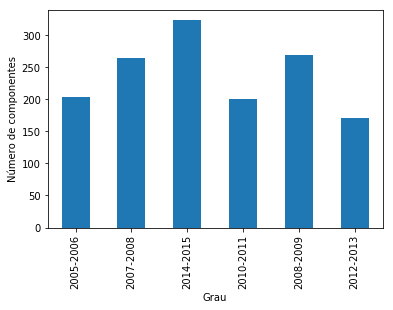

In [19]:
number_components = []
for graph in graphs_per_year.values():
    number_components.append(graph.number_strongly_connected_component())

#number_components_df = pd.DataFrame(np.array(number_components).reshape(1,6), columns=keys)
number_components_df = pd.DataFrame(np.array(number_components), index=keys)

p = number_components_df.plot.bar(legend=False)
p.set_xlabel('Grau')
p.set_ylabel(u'Número de componentes')

## Hubs and authorities

In [20]:
h,a = G.hubs_and_authorities() # Retorna dois dicionários com o vértice e sua taxa de hub e autoridade

In [21]:
hubs = list(h.items())
hubs.sort(key=lambda x: x[1], reverse=True)
hubs = [i for i in hubs if i[1] > 0]
print(hubs[:5])
print(len(hubs))
print(hubs)

[(u're 641320 stf', 0.8285101624490747), (u'rcl 14872 stf', 0.07024283597129884), (u'adpf 388 stf', 0.050858997926714666), (u'rcl 8853 stf', 0.04920177226779958), (u'hc 126560 stf', 0.001163954610863259)]
12
[(u're 641320 stf', 0.8285101624490747), (u'rcl 14872 stf', 0.07024283597129884), (u'adpf 388 stf', 0.050858997926714666), (u'rcl 8853 stf', 0.04920177226779958), (u'hc 126560 stf', 0.001163954610863259), (u'hc 129673 stf', 2.2259459344107386e-05), (u'inq 3983 stf', 1.4073885095459705e-08), (u'adpf 378 stf', 3.2410200033512743e-09), (u'hc 122791 stf', 1.9106736891464447e-21), (u'are 923172 stf', 1.9106736891464447e-21), (u'are 891473 stf', 6.8809584868585396e-37), (u'hc 123068 stf', 1.756389470126388e-52)]


In [22]:
aut = list(a.items())
aut.sort(key=lambda x: x[1], reverse=True)
aut = [i for i in aut if i[1] > 0]
print(aut[:5])
print(len(aut))
print(aut[-5:])

[(u'hc 82959 stf', 0.017774298380028745), (u'sum. vinc. 26 stf', 0.017774298380028745), (u'adpf 54 stf', 0.017390951545804157), (u'adi 1127 stf', 0.017358177215552044), (u'mi 670 stf', 0.016385132360223736)]
312
[(u'hc 113186 stf', 2.6939989960281535e-53), (u'hc 9597845 stf', 2.6939989960281535e-53), (u'hc 113049 stf', 2.6939989960281535e-53), (u'resp 1433 stj', 2.6939989960281535e-53), (u'hc 97652 stf', 2.6939989960281535e-53)]
